<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df =pd.read_csv('/content/Heart Attack Data Set.csv')

In [ ]:
# Quick look at the data
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

All are numerical values. No null values. Totall records 303.

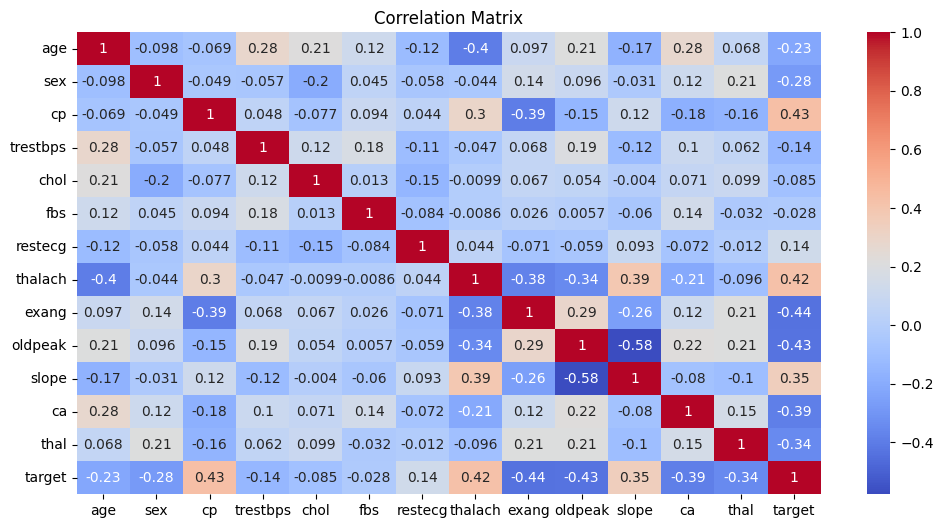

In [ ]:
# Visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Preprocessing
target = 'target'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building and Evaluating the Decision Tree
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Confusion Matrix:
 [[26  3]
 [10 22]]


**Accuracy:**  78.69%

→ Model correctly predicted about 79% of the cases.

**Confusion Matrix Interpretation**

**True Positives (TP)** = 22 → Actual heart attacks correctly identified

**False Negatives (FN)** = 10 → Heart attacks missed (predicted as "no attack")

**False Positives (FP)** = 3 → False alarms (predicted attack, but actually no attack)

**True Negatives (TN)** = 26 → Correctly predicted no heart attack

**Inferences**

Model is slightly biased toward predicting non-heart attacks, which increases recall for Class 0 but at the expense of false negatives for heart attacks (class 1).

Precision for heart attack detection is high (0.88), meaning most predicted attacks are truly at risk.

Recall for heart attacks is lower (0.69), which is not ideal in medical contexts—we want to catch as many actual heart attack risks as possible.

** Recommendations**

Reduce False Negatives (10 cases): These are potentially dangerous, as they miss patients who are at risk.

Try balancing class weights or use techniques like SMOTE if the dataset is imbalanced.

Use Ensemble Models like Random Forest or XGBoost for better generalization and fewer missed cases.

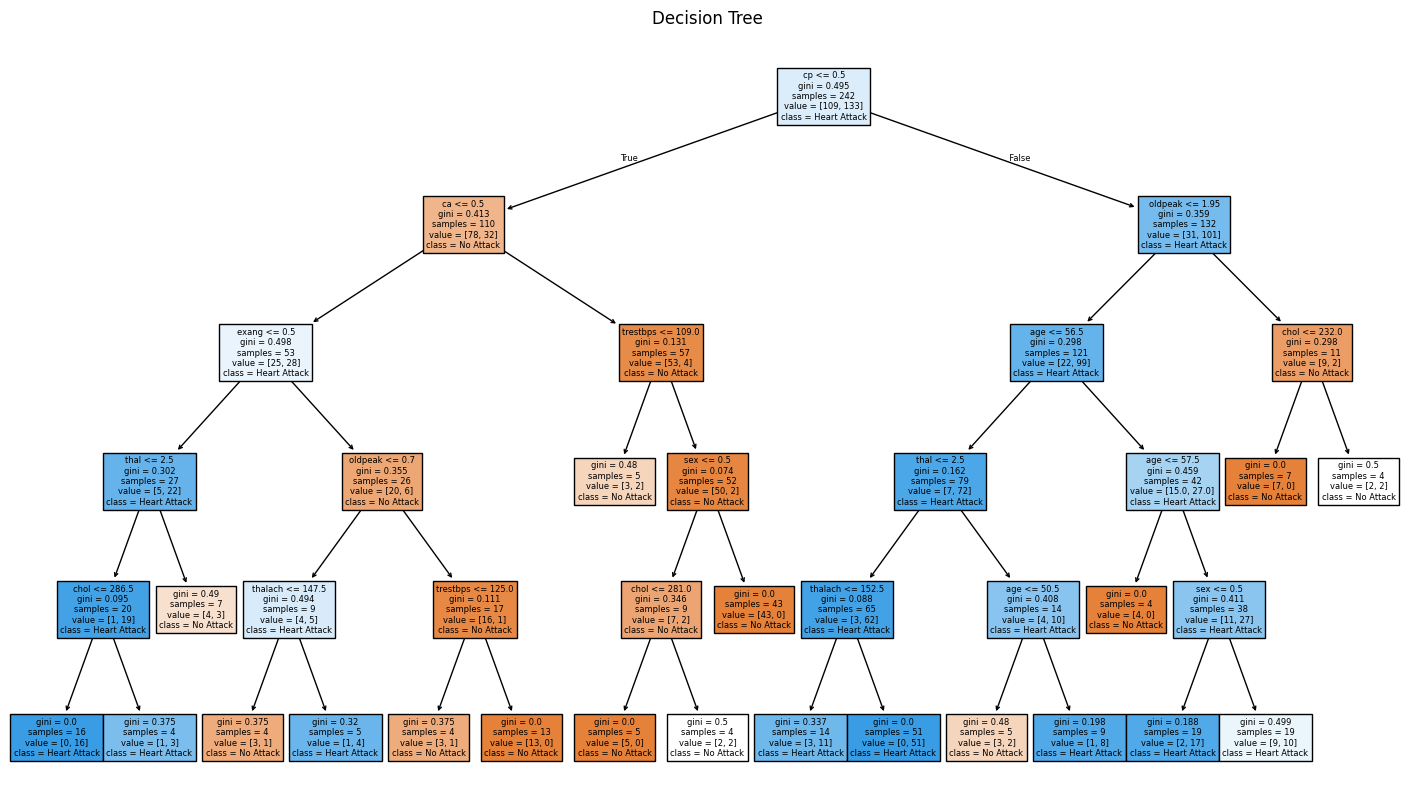

In [ ]:
# Tree visualization
plt.figure(figsize=(18, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Attack', 'Heart Attack'])
plt.title('Decision Tree')
plt.show()

In [ ]:
# 5. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
final_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, final_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8}
Tuned Model Accuracy: 0.8524590163934426


**🚀 Tuned Accuracy**

**New Accuracy:** 85.25%

**Old Accuracy:** 78.69%

**🔼 Gain:** +6.56% improvement

In [ ]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))

Accuracy: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:
 [[26  3]
 [ 6 26]]
